# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Pre-Processing and Training Data](#4_Pre-Processing_and_Training_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load Data](#4.4_Load_Data)
  * [4.5 Extract Big Mountain Data](#4.5_Extract_Big_Mountain_Data)
  * [4.6 Train/Test Split](#4.6_Train/Test_Split)
  * [4.7 Initial Not-Even-A-Model](#4.7_Initial_Not-Even-A-Model)
    * [4.7.1 Metrics](#4.7.1_Metrics)
      * [4.7.1.1 R-squared, or coefficient of determination](#4.7.1.1_R-squared,_or_coefficient_of_determination)
      * [4.7.1.2 Mean Absolute Error](#4.7.1.2_Mean_Absolute_Error)
      * [4.7.1.3 Mean Squared Error](#4.7.1.3_Mean_Squared_Error)
    * [4.7.2 sklearn metrics](#4.7.2_sklearn_metrics)
        * [4.7.2.0.1 R-squared](#4.7.2.0.1_R-squared)
        * [4.7.2.0.2 Mean absolute error](#4.7.2.0.2_Mean_absolute_error)
        * [4.7.2.0.3 Mean squared error](#4.7.2.0.3_Mean_squared_error)
    * [4.7.3 Note On Calculating Metrics](#4.7.3_Note_On_Calculating_Metrics)
  * [4.8 Initial Models](#4.8_Initial_Models)
    * [4.8.1 Imputing missing feature (predictor) values](#4.8.1_Imputing_missing_feature_(predictor)_values)
      * [4.8.1.1 Impute missing values with median](#4.8.1.1_Impute_missing_values_with_median)
        * [4.8.1.1.1 Learn the values to impute from the train set](#4.8.1.1.1_Learn_the_values_to_impute_from_the_train_set)
        * [4.8.1.1.2 Apply the imputation to both train and test splits](#4.8.1.1.2_Apply_the_imputation_to_both_train_and_test_splits)
        * [4.8.1.1.3 Scale the data](#4.8.1.1.3_Scale_the_data)
        * [4.8.1.1.4 Train the model on the train split](#4.8.1.1.4_Train_the_model_on_the_train_split)
        * [4.8.1.1.5 Make predictions using the model on both train and test splits](#4.8.1.1.5_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [4.8.1.1.6 Assess model performance](#4.8.1.1.6_Assess_model_performance)
      * [4.8.1.2 Impute missing values with the mean](#4.8.1.2_Impute_missing_values_with_the_mean)
        * [4.8.1.2.1 Learn the values to impute from the train set](#4.8.1.2.1_Learn_the_values_to_impute_from_the_train_set)
        * [4.8.1.2.2 Apply the imputation to both train and test splits](#4.8.1.2.2_Apply_the_imputation_to_both_train_and_test_splits)
        * [4.8.1.2.3 Scale the data](#4.8.1.2.3_Scale_the_data)
        * [4.8.1.2.4 Train the model on the train split](#4.8.1.2.4_Train_the_model_on_the_train_split)
        * [4.8.1.2.5 Make predictions using the model on both train and test splits](#4.8.1.2.5_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [4.8.1.2.6 Assess model performance](#4.8.1.2.6_Assess_model_performance)
    * [4.8.2 Pipelines](#4.8.2_Pipelines)
      * [4.8.2.1 Define the pipeline](#4.8.2.1_Define_the_pipeline)
      * [4.8.2.2 Fit the pipeline](#4.8.2.2_Fit_the_pipeline)
      * [4.8.2.3 Make predictions on the train and test sets](#4.8.2.3_Make_predictions_on_the_train_and_test_sets)
      * [4.8.2.4 Assess performance](#4.8.2.4_Assess_performance)
  * [4.9 Refining The Linear Model](#4.9_Refining_The_Linear_Model)
    * [4.9.1 Define the pipeline](#4.9.1_Define_the_pipeline)
    * [4.9.2 Fit the pipeline](#4.9.2_Fit_the_pipeline)
    * [4.9.3 Assess performance on the train and test set](#4.9.3_Assess_performance_on_the_train_and_test_set)
    * [4.9.4 Define a new pipeline to select a different number of features](#4.9.4_Define_a_new_pipeline_to_select_a_different_number_of_features)
    * [4.9.5 Fit the pipeline](#4.9.5_Fit_the_pipeline)
    * [4.9.6 Assess performance on train and test data](#4.9.6_Assess_performance_on_train_and_test_data)
    * [4.9.7 Assessing performance using cross-validation](#4.9.7_Assessing_performance_using_cross-validation)
    * [4.9.8 Hyperparameter search using GridSearchCV](#4.9.8_Hyperparameter_search_using_GridSearchCV)
  * [4.10 Random Forest Model](#4.10_Random_Forest_Model)
    * [4.10.1 Define the pipeline](#4.10.1_Define_the_pipeline)
    * [4.10.2 Fit and assess performance using cross-validation](#4.10.2_Fit_and_assess_performance_using_cross-validation)
    * [4.10.3 Hyperparameter search using GridSearchCV](#4.10.3_Hyperparameter_search_using_GridSearchCV)
  * [4.11 Final Model Selection](#4.11_Final_Model_Selection)
    * [4.11.1 Linear regression model performance](#4.11.1_Linear_regression_model_performance)
    * [4.11.2 Random forest regression model performance](#4.11.2_Random_forest_regression_model_performance)
    * [4.11.3 Conclusion](#4.11.3_Conclusion)
  * [4.12 Data quantity assessment](#4.12_Data_quantity_assessment)
  * [4.13 Save best model object from pipeline](#4.13_Save_best_model_object_from_pipeline)
  * [4.14 Summary](#4.14_Summary)


## 4.2 Introduction<a id='4.2_Introduction'></a>

In preceding notebooks, performed preliminary assessments of data quality and refined the question to be answered. You found a small number of data values that gave clear choices about whether to replace values or drop a whole row. You determined that predicting the adult weekend ticket price was your primary aim. You threw away records with missing price data, but not before making the most of the other available data to look for any patterns between the states. You didn't see any and decided to treat all states equally; the state label didn't seem to be particularly useful.

In this notebook you'll start to build machine learning models. Before even starting with learning a machine learning model, however, start by considering how useful the mean value is as a predictor. This is more than just a pedagogical device. You never want to go to stakeholders with a machine learning model only to have the CEO point out that it performs worse than just guessing the average! Your first model is a baseline performance comparitor for any subsequent model. You then build up the process of efficiently and robustly creating and assessing models against it. The development we lay out may be little slower than in the real world, but this step of the capstone is definitely more than just instructional. It is good practice to build up an understanding that the machine learning pipelines you build work as expected. You can validate steps with your own functions for checking expected equivalence between, say, pandas and sklearn implementations.

## 4.3 Imports<a id='4.3_Imports'></a>

In [9]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from library.sb_utils import save_file

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## 4.4 Load Data<a id='4.4_Load_Data'></a>

In [10]:
ski_data = pd.read_csv('../data/ski_data_step3_features.csv')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


## 4.5 Extract Big Mountain Data<a id='4.5_Extract_Big_Mountain_Data'></a>

Big Mountain is your resort. Separate it from the rest of the data to use later.

In [11]:
big_mountain = ski_data[ski_data.Name == 'Big Mountain Resort']

In [4]:
big_mountain.T

,124
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastSixes,0
fastQuads,3
quad,2


In [297]:
ski_data.shape

(327, 26)

In [298]:
ski_data = ski_data[ski_data.Name != 'Big Mountain Resort']

In [299]:
ski_data.shape

(327, 26)

## 4.6 Train/Test Split<a id='4.6_Train/Test_Split'></a>

So far, you've treated ski resort data as a single entity. In machine learning, when you train your model on all of your data, you end up with no data set aside to evaluate model performance. You could keep making more and more complex models that fit the data better and better and not realise you were overfitting to that one set of samples. By partitioning the data into training and testing splits, without letting a model (or missing-value imputation) learn anything about the test split, you have a somewhat independent assessment of how your model might perform in the future. An often overlooked subtlety here is that people all too frequently use the test set to assess model performance _and then compare multiple models to pick the best_. This means their overall model selection process is  fitting to one specific data set, now the test split. You could keep going, trying to get better and better performance on that one data set, but that's  where cross-validation becomes especially useful. While training models, a test split is very useful as a final check on expected future performance.

What partition sizes would you have with a 70/30 train/test split?

In [300]:
len(ski_data) * .7, len(ski_data) * .3

(228.89999999999998, 98.1)

In [301]:
X_train, X_test, y_train, y_test = train_test_split(ski_data.drop(columns='AdultWeekend'), 
                                                    ski_data.AdultWeekend, test_size=0.3, 
                                                    random_state=47)

In [302]:
X_train.shape, X_test.shape

((228, 25), (99, 25))

In [303]:
y_train.shape, y_test.shape

((228,), (99,))

In [304]:
# Save the 'Name', 'state', and 'Region' columns from the train/test data into names_train and names_test
# Then drop those columns from X_train and X_test. Use 'inplace=True'

# Make sure to use the column names ('Name', 'state', 'Region') instead of variables ('names_train', 'names_test')
names_list = ['Name', 'state', 'Region']
names_train = X_train[names_list]  # Use names_list here
names_test = X_test[names_list]    # Use names_list here

# Drop the columns using the correct DataFrame (X_train and X_test)
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)

# Check the shapes of the modified DataFrames
X_train.shape, X_test.shape

((228, 22), (99, 22))

In [19]:
#Code task 2#
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object

In [305]:
#Code task 3#
#Repeat this check for the test split in `X_test`
X_test.shape

(99, 22)

You have only numeric features in your X now!

## 4.7 Initial Not-Even-A-Model<a id='4.7_Initial_Not-Even-A-Model'></a>

A good place to start is to see how good the mean is as a predictor. In other words, what if you simply say your best guess is the average price?

In [306]:
#Code task 4#
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

63.25360824742268

`sklearn`'s `DummyRegressor` easily does this:

In [310]:
# Remove rows with NaN values from X_train and y_train
X_train_clean = X_train.dropna()
y_train_clean = y_train.loc[X_train_clean.index]

# Fit the dummy regressor on the cleaned training data
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train_clean, y_train_clean)

# Print the object's `constant_` attribute
print("Dummy Regressor Constant:", dumb_reg.constant_)

Dummy Regressor Constant: [[62.2292]]


How good is this? How closely does this match, or explain, the actual values? There are many ways of assessing how good one set of values agrees with another, which brings us to the subject of metrics.

### 4.7.1 Metrics<a id='4.7.1_Metrics'></a>

#### 4.7.1.1 R-squared, or coefficient of determination<a id='4.7.1.1_R-squared,_or_coefficient_of_determination'></a>

One measure is $R^2$, the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination). This is a measure of the proportion of variance in the dependent variable (our ticket price) that is predicted by our "model". The linked Wikipedia articles gives a nice explanation of how negative values can arise. This is frequently a cause of confusion for newcomers who, reasonably, ask how can a squared value be negative?

Recall the mean can be denoted by $\bar{y}$, where

$$\bar{y} = \frac{1}{n}\sum_{i=1}^ny_i$$

and where $y_i$ are the individual values of the dependent variable.

The total sum of squares (error), can be expressed as

$$SS_{tot} = \sum_i(y_i-\bar{y})^2$$

The above formula should be familiar as it's simply the variance without the denominator to scale (divide) by the sample size.

The residual sum of squares is similarly defined to be

$$SS_{res} = \sum_i(y_i-\hat{y})^2$$

where $\hat{y}$ are our predicted values for the depended variable.

The coefficient of determination, $R^2$, here is given by

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

Putting it into words, it's one minus the ratio of the residual variance to the original variance. Thus, the baseline model here, which always predicts $\bar{y}$, should give $R^2=0$. A model that perfectly predicts the observed values would have no residual error and so give $R^2=1$. Models that do worse than predicting the mean will have increased the sum of squares of residuals and so produce a negative $R^2$.

In [ ]:
#Code task 6#
#Calculate the R^2 as defined above
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.___((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.___((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - ___ / ___
    return R2

In [311]:
#Code task 6#
#Calculate the R^2 as defined above
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - (sum_sq_res / sum_sq_tot)
    return R2

Make your predictions by creating an array of length the size of the training set with the single value of the mean.

In [312]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([63.25360825, 63.25360825, 63.25360825, 63.25360825, 63.25360825])

Remember the `sklearn` dummy regressor? 

In [313]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([62.2292, 62.2292, 62.2292, 62.2292, 62.2292])

You can see that `DummyRegressor` produces exactly the same results and saves you having to mess about broadcasting the mean (or whichever other statistic we used - check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) to see what's available) to an array of the appropriate length. It also gives you an object with `fit()` and `predict()` methods as well so you can use them as conveniently as any other `sklearn` estimator.

In [314]:
r_squared(y_train, y_tr_pred)

0.1339911220695874

Exactly as expected, if you use the average value as your prediction, you get an $R^2$ of zero _on our training set_. What if you use this "model" to predict unseen values from the test set? Remember, of course, that your "model" is trained on the training set; you still use the training set mean as your prediction.

Make your predictions by creating an array of length the size of the test set with the single value of the (training) mean.

In [315]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

0.14718561854255485

Generally, you can expect performance on a test set to be slightly worse than on the training set. As you are getting an $R^2$ of zero on the training set, there's nowhere to go but negative!

$R^2$ is a common metric, and interpretable in terms of the amount of variance explained, it's less appealing if you want an idea of how "close" your predictions are to the true values. Metrics that summarise the difference between predicted and actual values are _mean absolute error_ and _mean squared error_.

#### 4.7.1.2 Mean Absolute Error<a id='4.7.1.2_Mean_Absolute_Error'></a>

This is very simply the average of the absolute errors:

$$MAE = \frac{1}{n}\sum_i^n|y_i - \hat{y}|$$

In [316]:
#Code task 7#
#Calculate the MAE as defined above
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [317]:
mae(y_train, y_tr_pred)

17.410296907216495

In [318]:
mae(y_test, y_te_pred)

19.824769927080716

Mean absolute error is arguably the most intuitive of all the metrics, this essentially tells you that, on average, you might expect to be off by around \\$19 if you guessed ticket price based on an average of known values.

#### 4.7.1.3 Mean Squared Error<a id='4.7.1.3_Mean_Squared_Error'></a>

Another common metric (and an important one internally for optimizing machine learning models) is the mean squared error. This is simply the average of the square of the errors:

$$MSE = \frac{1}{n}\sum_i^n(y_i - \hat{y})^2$$

In [257]:
#Code task 8#
#Calculate the MSE as defined above
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [258]:
mse(y_train, y_tr_pred)

482.6322924308193

In [259]:
mse(y_test, y_te_pred)

694.5989418854288

So here, you get a slightly better MSE on the test set than you did on the train set. And what does a squared error mean anyway? To convert this back to our measurement space, we often take the square root, to form the _root mean square error_ thus:

In [260]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([21.96889375, 26.35524505])

### 4.7.2 sklearn metrics<a id='4.7.2_sklearn_metrics'></a>

Functions are good, but you don't want to have to define functions every time we want to assess performance. `sklearn.metrics` provides many commonly used metrics, included the ones above.

##### 4.7.2.0.1 R-squared<a id='4.7.2.0.1_R-squared'></a>

In [319]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

ValueError: Input contains NaN.

In [263]:
# Remove rows with NaN values from y_train and y_tr_pred
y_train_clean = y_train[~np.isnan(y_tr_pred)]
y_tr_pred_clean = y_tr_pred[~np.isnan(y_tr_pred)]

# Calculate the R-squared score
r2_train = r2_score(y_train_clean, y_tr_pred_clean)

In [322]:

# Calculate R-squared for the training set
r2_train = r2_score(y_train_clean, y_tr_pred)

# Calculate R-squared for the test set
r2_test = r2_score(y_test_clean, y_te_pred)

# Create a tuple with the R-squared scores
r2_scores = (r2_train, r2_test)
r2_scores

ValueError: Found input variables with inconsistent numbers of samples: [75, 228]

##### 4.7.2.0.2 Mean absolute error<a id='4.7.2.0.2_Mean_absolute_error'></a>

In [326]:
# Filter rows without NaN values from y_train and y_test
y_train_no_nan = y_train[~np.isnan(y_train)]
y_test_no_nan = y_test[~np.isnan(y_test)]

# Filter corresponding predictions to align with filtered y_train and y_test
y_tr_pred_no_nan = y_tr_pred[~np.isnan(y_train)]
y_te_pred_no_nan = y_te_pred[~np.isnan(y_test)]

# Calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
mae_train = mean_absolute_error(y_train_no_nan, y_tr_pred_no_nan)
mae_test = mean_absolute_error(y_test_no_nan, y_te_pred_no_nan)

# Create a tuple with the MAE scores
median_mae = (mae_train, mae_test)
median_mae

(17.410296907216495, 19.824769927080716)

##### 4.7.2.0.3 Mean squared error<a id='4.7.2.0.3_Mean_squared_error'></a>

In [329]:
# Filter rows without NaN values from y_train and y_test
y_train_no_nan = y_train[~np.isnan(y_train)]
y_test_no_nan = y_test[~np.isnan(y_test)]

# Filter corresponding predictions to align with filtered y_train and y_test
y_tr_pred_no_nan = y_tr_pred[~np.isnan(y_train)]
y_te_pred_no_nan = y_te_pred[~np.isnan(y_test)]

# Calculate the mean squared error scores using `sklearn`'s `mean_squared_error` function
mse_train = mean_squared_error(y_train_no_nan, y_tr_pred_no_nan)
mse_test = mean_squared_error(y_test_no_nan, y_te_pred_no_nan)

# Create a tuple with the MSE scores
median_mse = (mse_train, mse_test)
median_mse

(568.2667456296908, 694.5989418854288)

### 4.7.3 Note On Calculating Metrics<a id='4.7.3_Note_On_Calculating_Metrics'></a>

When calling functions to calculate metrics, it is important to take care in the order of the arguments. Two of the metrics above actually don't care if the arguments are reversed; one does. Which one cares?

In a Jupyter code cell, running `r2_score?` will bring up the docstring for the function, and `r2_score??` will bring up the actual code of the function! Try them and compare the source for `sklearn`'s function with yours. Feel free to explore what happens when you reverse the order of the arguments and compare behaviour of `sklearn`'s function and yours.

In [331]:
# Filter rows without NaN values from y_train and y_test
y_train_no_nan = y_train[~np.isnan(y_train)]
y_test_no_nan = y_test[~np.isnan(y_test)]

# Filter corresponding predictions to align with filtered y_train and y_test
y_tr_pred_no_nan = y_tr_pred[~np.isnan(y_train)]
y_te_pred_no_nan = y_te_pred[~np.isnan(y_test)]

# Calculate R-squared for the training set with correct order
r2_train_correct_order = r2_score(y_train_no_nan, y_tr_pred_no_nan)

# Calculate R-squared for the training set with incorrect order
r2_train_incorrect_order = r2_score(y_tr_pred_no_nan, y_train_no_nan)

# Create a tuple with both R-squared scores
r2_scores = (r2_train_correct_order, r2_train_incorrect_order)
r2_scores

(-0.0018501061156728227, 0.0)

In [332]:
# train set - using our homebrew function
# correct order, incorrect order
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

(0.1339911220695874, -9.577203546485795e+30)

In [333]:
# test set - using our homebrew function
# correct order, incorrect order
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

C:\Users\nicho\AppData\Local\Temp\ipykernel_17176\1548124803.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  R2 = 1.0 - (sum_sq_res / sum_sq_tot)


(0.14718561854255485, -inf)

You can get very different results swapping the argument order. It's worth highlighting this because data scientists do this too much in the real world! Don't be one of them! Frequently the argument order doesn't matter, but it will bite you when you do it with a function that does care. It's sloppy, bad practice and if you don't make a habit of putting arguments in the right order, you will forget!

Remember:
* argument order matters,
* check function syntax with `func?` in a code cell

## 4.8 Initial Models<a id='4.8_Initial_Models'></a>

### 4.8.1 Imputing missing feature (predictor) values<a id='4.8.1_Imputing_missing_feature_(predictor)_values'></a>

Recall when performing EDA, you imputed (filled in) some missing values in pandas. You did this judiciously for exploratory/visualization purposes. You left many missing values in the data. You can impute missing values using scikit-learn, but note that you should learn values to impute from a train split and apply that to the test split to then assess how well your imputation worked.

#### 4.8.1.1 Impute missing values with median<a id='4.8.1.1_Impute_missing_values_with_median'></a>

There's missing values. Recall from your data exploration that many distributions were skewed. Your first thought might be to impute missing values using the median.

##### 4.8.1.1.1 Learn the values to impute from the train set<a id='4.8.1.1.1_Learn_the_values_to_impute_from_the_train_set'></a>

In [270]:
# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()
X_defaults_median

summit_elev          2834.0
vertical_drop         984.5
base_elev            1408.5
trams                   0.0
fastSixes               0.0
fastQuads               0.0
quad                    0.0
triple                  1.0
double                  1.0
surface                 2.0
total_chairs            7.0
Runs                   31.0
TerrainParks            2.0
LongestRun_mi           1.0
SkiableTerrain_ac     200.0
Snow Making_ac        100.0
daysOpenLastYear      111.0
yearsOpen              57.0
averageSnowfall       140.0
AdultWeekday           50.0
projectedDaysOpen     120.0
NightSkiing_ac         70.0
dtype: float64

##### 4.8.1.1.2 Apply the imputation to both train and test splits<a id='4.8.1.1.2_Apply_the_imputation_to_both_train_and_test_splits'></a>

In [271]:
# Calculate median values for each column in X_train
X_defaults_median = X_train.median()

#Code task 9#
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

##### 4.8.1.1.3 Scale the data<a id='4.8.1.1.3_Scale_the_data'></a>

As you have features measured in many different units, with numbers that vary by orders of magnitude, start off by scaling them to put them all on a consistent scale. The [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) scales each feature to zero mean and unit variance.

In [272]:
#Code task 10#
#Call the StandardScaler's fit method on `X_tr` to fit the scaler
#then use its `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

##### 4.8.1.1.4 Train the model on the train split<a id='4.8.1.1.4_Train_the_model_on_the_train_split'></a>

In [334]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

ValueError: Input y contains NaN.

In [385]:
# Combine X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Remove rows with NaN values in the target variable 'target_column'
target_column = 'your_target_column_name_'  # Replace with the actual name of your target variable
train_data.dropna(subset=[target_column], inplace=True)

# Separate the target variable from the features
X_train_cleaned = train_data.drop(columns=[target_column])
y_train_cleaned = train_data[target_column]

# Fit the linear regression model on the cleaned data
lm = LinearRegression().fit(X_train_cleaned, y_train_cleaned)

KeyError: ['your_target_column_name_here']

##### 4.8.1.1.5 Make predictions using the model on both train and test splits<a id='4.8.1.1.5_Make_predictions_using_the_model_on_both_train_and_test_splits'></a>

In [274]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

##### 4.8.1.1.6 Assess model performance<a id='4.8.1.1.6_Assess_model_performance'></a>

In [335]:
# Filter rows without NaN values from y_train and y_test
y_train_no_nan = y_train[~np.isnan(y_train)]
y_test_no_nan = y_test[~np.isnan(y_test)]

# Filter corresponding predictions to align with filtered y_train and y_test
y_tr_pred_no_nan = y_tr_pred[~np.isnan(y_train)]
y_te_pred_no_nan = y_te_pred[~np.isnan(y_test)]

# Calculate R-squared for the training and test sets
r2_train = r2_score(y_train_no_nan, y_tr_pred_no_nan)
r2_test = r2_score(y_test_no_nan, y_te_pred_no_nan)

# Create a tuple with both R-squared scores
median_r2 = (r2_train, r2_test)
median_r2

(-0.0018501061156728227, -0.015329162519343242)

Recall that you estimated ticket price by simply using a known average. As expected, this produced an $R^2$ of zero for both the training and test set, because $R^2$ tells us how much of the variance you're explaining beyond that of using just the mean, and you were using just the mean. Here we see that our simple linear regression model explains over 80% of the variance on the train set and over 70% on the test set. Clearly you are onto something, although the much lower value for the test set suggests you're overfitting somewhat. This isn't a surprise as you've made no effort to select a parsimonious set of features or deal with multicollinearity in our data.

In [ ]:
#Code task 12#
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = ___(y_train, y_tr_pred), ___(y_test, y_te_pred)
median_mae

Using this model, then, on average you'd expect to estimate a ticket price within \\$9 or so of the real price. This is much, much better than the \\$19 from just guessing using the average. There may be something to this machine learning lark after all!

In [ ]:
#Code task 13#
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = ___(___, ___), ___(___, ___)
median_mse

In [277]:
# Calculate the mean squared error scores using `sklearn`'s `mean_squared_error` function
median_mse = mean_squared_error(y_train_clean, y_tr_pred[X_train_clean.index]), mean_squared_error(y_test_clean, y_te_pred[X_test_clean.index])
median_mse

IndexError: index 245 is out of bounds for axis 0 with size 228

#### 4.8.1.2 Impute missing values with the mean<a id='4.8.1.2_Impute_missing_values_with_the_mean'></a>

You chose to use the median for filling missing values because of the skew of many of our predictor feature distributions. What if you wanted to try something else, such as the mean?

##### 4.8.1.2.1 Learn the values to impute from the train set<a id='4.8.1.2.1_Learn_the_values_to_impute_from_the_train_set'></a>

In [208]:
# Calculate mean values for imputing missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

summit_elev          4401.438596
vertical_drop        1174.938596
base_elev            3227.557018
trams                   0.166667
fastSixes               0.179825
fastQuads               0.925439
quad                    0.925439
triple                  1.451754
double                  1.785088
surface                 2.701754
total_chairs            8.135965
Runs                   46.588496
TerrainParks            2.783505
LongestRun_mi           1.412832
SkiableTerrain_ac     608.210526
Snow Making_ac        178.688776
daysOpenLastYear      113.649485
yearsOpen              57.438596
averageSnowfall       176.821918
AdultWeekday           56.432487
projectedDaysOpen     120.780000
NightSkiing_ac         91.798507
dtype: float64

By eye, you can immediately tell that your replacement values are much higher than those from using the median.

##### 4.8.1.2.2 Apply the imputation to both train and test splits<a id='4.8.1.2.2_Apply_the_imputation_to_both_train_and_test_splits'></a>

In [279]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

##### 4.8.1.2.3 Scale the data<a id='4.8.1.2.3_Scale_the_data'></a>

In [280]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

##### 4.8.1.2.4 Train the model on the train split<a id='4.8.1.2.4_Train_the_model_on_the_train_split'></a>

In [281]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

##### 4.8.1.2.5 Make predictions using the model on both train and test splits<a id='4.8.1.2.5_Make_predictions_using_the_model_on_both_train_and_test_splits'></a>

In [282]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

##### 4.8.1.2.6 Assess model performance<a id='4.8.1.2.6_Assess_model_performance'></a>

In [50]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.536884040670973, 9.416375625789271)

In [336]:
# Filter rows without NaN values from y_train and y_test
y_train_no_nan = y_train[~np.isnan(y_train)]
y_test_no_nan = y_test[~np.isnan(y_test)]

# Filter corresponding predictions to align with filtered y_train and y_test
y_tr_pred_no_nan = y_tr_pred[~np.isnan(y_train)]
y_te_pred_no_nan = y_te_pred[~np.isnan(y_test)]

# Calculate R-squared for the training and test sets
r2_train = r2_score(y_train_no_nan, y_tr_pred_no_nan)
r2_test = r2_score(y_test_no_nan, y_te_pred_no_nan)

# Create a tuple with both R-squared scores
median_r2 = (r2_train, r2_test)
median_r2

(-0.0018501061156728227, -0.015329162519343242)

These results don't seem very different to when you used the median for imputing missing values. Perhaps it doesn't make much difference here. Maybe your overtraining dominates. Maybe other feature transformations, such as taking the log, would help. You could try with just a subset of features rather than using all of them as inputs.

To perform the median/mean comparison, you copied and pasted a lot of code just to change the function for imputing missing values. It would make more sense to write a function that performed the sequence of steps:
1. impute missing values
2. scale the features
3. train a model
4. calculate model performance

But these are common steps and `sklearn` provides something much better than writing custom functions.

### 4.8.2 Pipelines<a id='4.8.2_Pipelines'></a>

One of the most important and useful components of `sklearn` is the [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). In place of `panda`'s `fillna` DataFrame method, there is `sklearn`'s `SimpleImputer`. Remember the first linear model above performed the steps:

1. replace missing values with the median for each feature
2. scale the data to zero mean and unit variance
3. train a linear regression model

and all these steps were trained on the train split and then applied to the test split for assessment.

The pipeline below defines exactly those same steps. Crucially, the resultant `Pipeline` object has a `fit()` method and a `predict()` method, just like the `LinearRegression()` object itself. Just as you might create a linear regression model and train it with `.fit()` and predict with `.predict()`, you can wrap the entire process of imputing and feature scaling and regression in a single object you can train with `.fit()` and predict with `.predict()`. And that's basically a pipeline: a model on steroids.

#### 4.8.2.1 Define the pipeline<a id='4.8.2.1_Define_the_pipeline'></a>

In [337]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [338]:
type(pipe)

sklearn.pipeline.Pipeline

In [339]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

#### 4.8.2.2 Fit the pipeline<a id='4.8.2.2_Fit_the_pipeline'></a>

Here, a single call to the pipeline's `fit()` method combines the steps of learning the imputation (determining what values to use to fill the missing ones), the scaling (determining the mean to subtract and the variance to divide by), and then training the model. It does this all in the one call with the training data as arguments.

In [ ]:
#Code task 15#
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments


In [213]:
# Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### 4.8.2.3 Make predictions on the train and test sets<a id='4.8.2.3_Make_predictions_on_the_train_and_test_sets'></a>

In [285]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

#### 4.8.2.4 Assess performance<a id='4.8.2.4_Assess_performance'></a>

In [341]:

# Filter rows without NaN values from y_train and y_test
y_train_no_nan = y_train[~np.isnan(y_train)]
y_test_no_nan = y_test[~np.isnan(y_test)]

# Filter corresponding predictions to align with filtered y_train and y_test
y_tr_pred_no_nan = y_tr_pred[~np.isnan(y_train)]
y_te_pred_no_nan = y_te_pred[~np.isnan(y_test)]

# Calculate R-squared for the training and test sets
r2_train = r2_score(y_train_no_nan, y_tr_pred_no_nan)
r2_test = r2_score(y_test_no_nan, y_te_pred_no_nan)

# Create a tuple with both R-squared scores
r2_scores = (r2_train, r2_test)
r2_scores

(-0.0018501061156728227, -0.015329162519343242)

And compare with your earlier (non-pipeline) result:

In [286]:
median_r2

NameError: name 'median_r2' is not defined

In [ ]:
Compare with your earlier result:

In [288]:
median_mae

NameError: name 'median_mae' is not defined

In [61]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(111.89581253658478, 161.73156451192284)

Compare with your earlier result:

In [289]:
median_mse

NameError: name 'median_mse' is not defined

These results confirm the pipeline is doing exactly what's expected, and results are identical to your earlier steps. This allows you to move faster but with confidence.

## 4.9 Refining The Linear Model<a id='4.9_Refining_The_Linear_Model'></a>

You suspected the model was overfitting. This is no real surprise given the number of features you blindly used. It's likely a judicious subset of features would generalize better. `sklearn` has a number of feature selection functions available. The one you'll use here is `SelectKBest` which, as you might guess, selects the k best features. You can read about SelectKBest 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest). `f_regression` is just the [score function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression) you're using because you're performing regression. It's important to choose an appropriate one for your machine learning task.

### 4.9.1 Define the pipeline<a id='4.9.1_Define_the_pipeline'></a>

Redefine your pipeline to include this feature selection step:

In [290]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression),
    LinearRegression()
)

### 4.9.2 Fit the pipeline<a id='4.9.2_Fit_the_pipeline'></a>

In [248]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x00000226740883A0>)),
                ('linearregression', LinearRegression())])

### 4.9.3 Assess performance on the train and test set<a id='4.9.3_Assess_performance_on_the_train_and_test_set'></a>

In [249]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [67]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.501495079727484, 11.201830190332057)

This has made things worse! Clearly selecting a subset of features has an impact on performance. `SelectKBest` defaults to k=10. You've just seen that 10 is worse than using all features. What is the best k? You could create a new pipeline with a different value of k:

### 4.9.4 Define a new pipeline to select a different number of features<a id='4.9.4_Define_a_new_pipeline_to_select_a_different_number_of_features'></a>

In [215]:
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=15),
    LinearRegression()
)

### 4.9.5 Fit the pipeline<a id='4.9.5_Fit_the_pipeline'></a>

In [69]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7fc8cd9c8950>)),
                ('linearregression', LinearRegression())])

### 4.9.6 Assess performance on train and test data<a id='4.9.6_Assess_performance_on_train_and_test_data'></a>

In [342]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [343]:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
regressor = LinearRegression()

# Create the pipeline with the defined steps
pipe15 = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('regressor', regressor)
])

# Fit the pipeline on your training data
pipe15.fit(X_train, y_train)

# Now, you can predict using the fitted pipeline
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

NameError: name 'Pipeline' is not defined

In [71]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7924096060483825, 0.6376199973170795)

You could keep going, trying different values of k, training a model, measuring performance on the test set, and then picking the model with the best test set performance. There's a fundamental problem with this approach: _you're tuning the model to the arbitrary test set_! If you continue this way you'll end up with a model works well on the particular quirks of our test set _but fails to generalize to new data_. The whole point of keeping a test set is for it to be a set of that new data, to check how well our model might perform on data it hasn't seen.

The way around this is a technique called _cross-validation_. You partition the training set into k folds, train our model on k-1 of those folds, and calculate performance on the fold not used in training. This procedure then cycles through k times with a different fold held back each time. Thus you end up building k models on k sets of data with k estimates of how the model performs on unseen data but without having to touch the test set.

### 4.9.7 Assessing performance using cross-validation<a id='4.9.7_Assessing_performance_using_cross-validation'></a>

In [344]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\nicho\anaconda3\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py", line 918, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py", line 498, in fit
    X, y = self._validate_data(
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1163, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1173, in _check_y
    y = check_array(
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input y contains NaN.


In [356]:
# Create a SimpleImputer instance to impute missing values with the mean
target_imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your target variable
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))

# Now, you can use `y_train_imputed` in your cross-validation
cv_results = cross_validate(pipe15, X_train, y_train_imputed.ravel(), cv=5)

In [357]:
cv_scores = cv_results['test_score']
cv_scores

array([0.86274619, 0.84645499, 0.89149623, 0.93099194, 0.67898374])

Without using the same random state for initializing the CV folds, your actual numbers will be different.

In [346]:
np.mean(cv_scores), np.std(cv_scores)

(0.8421346216900425, 0.08647994430116891)

These results highlight that assessing model performance in inherently open to variability. You'll get different results depending on the quirks of which points are in which fold. An advantage of this is that you can also obtain an estimate of the variability, or uncertainty, in your performance estimate.

In [347]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.67, 1.02])

### 4.9.8 Hyperparameter search using GridSearchCV<a id='4.9.8_Hyperparameter_search_using_GridSearchCV'></a>

Pulling the above together, we have:
* a pipeline that
    * imputes missing values
    * scales the data
    * selects the k best features
    * trains a linear regression model
* a technique (cross-validation) for estimating model performance

Now you want to use cross-validation for multiple values of k and use cross-validation to pick the value of k that gives the best performance. `make_pipeline` automatically names each step as the lowercase name of the step and the parameters of the step are then accessed by appending a double underscore followed by the parameter name. You know the name of the step will be 'selectkbest' and you know the parameter is 'k'.

You can also list the names of all the parameters in a pipeline like this:

In [365]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__keep_empty_features', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__positive'])

The above can be particularly useful as your pipelines becomes more complex (you can even nest pipelines within pipelines).

In [366]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

Now you have a range of `k` to investigate. Is 1 feature best? 2? 3? 4? All of them? You could write a for loop and iterate over each possible value, doing all the housekeeping oyurselves to track the best value of k. But this is  a common task so there's a built in function in `sklearn`. This is [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
This takes the pipeline object, in fact it takes anything with a `.fit()` and `.predict()` method. In simple cases with no feature selection or imputation or feature scaling etc. you may see the classifier or regressor object itself directly passed into `GridSearchCV`. The other key input is the parameters and values to search over. Optional parameters include the cross-validation strategy and number of CPUs to use.

In [367]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [360]:
lr_grid_cv.fit(X_train, y_train)

ValueError: Invalid parameter 'selectkbest' for estimator Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [218]:
#Code task 19#
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.___

NameError: name 'lr_grid_cv' is not defined

In [368]:
# Define your parameter grid for the GridSearchCV
param_grid = {
    'selectkbest__k': [1, 2, 3, 4, 5],
    'linearregression__normalize': [True, False]
}

# Create the GridSearchCV object
lr_grid_cv = GridSearchCV(pipe15, param_grid, cv=5)

# Fit the GridSearchCV object on your training data
lr_grid_cv.fit(X_train, y_train)

# Print the best_params_ attribute of lr_grid_cv
best_params = lr_grid_cv.best_params_
for param, value in best_params.items():
    print(f"{param}: {value}")

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [364]:
# Assign the value of k from the above dict of `best_params_` to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']

# The rest of your code
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

The above suggests a good value for k is 8. There was an initial rapid increase with k, followed by a slow decline. Also noticeable is the variance of the results greatly increase above k=8. As you increasingly overfit, expect greater swings in performance as different points move in and out of the train/test folds.

Which features were most useful? Step into your best model, shown below. Starting with the fitted grid search object, you get the best estimator, then the named step 'selectkbest', for which you can its `get_support()` method for a logical mask of the features selected.

In [369]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

Similarly, instead of using the 'selectkbest' named step, you can access the named step for the linear regression model and, from that, grab the model coefficients via its `coef_` attribute:

In [ ]:
#Code task 21#
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(___, index=___).___(ascending=___)

In [371]:
# Get the linear model coefficients
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_

# Get the matching feature names from the column names of the dataframe
features = X_train.columns[pipe15.named_steps['selectkbest'].get_support()]

# Create a Pandas Series with coefs as the values and features as the index,
# sorting the values in descending order
coef_series = pd.Series(coefs, index=features).sort_values(ascending=False)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

These results suggest that vertical drop is your biggest positive feature. This makes intuitive sense and is consistent with what you saw during the EDA work. Also, you see the area covered by snow making equipment is a strong positive as well. People like guaranteed skiing! The skiable terrain area is negatively associated with ticket price! This seems odd. People will pay less for larger resorts? There could be all manner of reasons for this. It could be  an effect whereby larger resorts can host more visitors at any one time and so can charge less per ticket. As has been mentioned previously, the data are missing information about visitor numbers. Bear in mind,  the coefficient for skiable terrain is negative _for this model_. For example, if you kept the total number of chairs and fastQuads constant, but increased the skiable terrain extent, you might imagine the resort is worse off because the chairlift capacity is stretched thinner.

## 4.10 Random Forest Model<a id='4.10_Random_Forest_Model'></a>

A model that can work very well in a lot of cases is the random forest. For regression, this is provided by `sklearn`'s `RandomForestRegressor` class.

Time to stop the bad practice of repeatedly checking performance on the test split. Instead, go straight from defining the pipeline to assessing performance using cross-validation. `cross_validate` will perform the fitting as part of the process. This uses the default settings for the random forest so you'll then proceed to investigate some different hyperparameters.

### 4.10.1 Define the pipeline<a id='4.10.1_Define_the_pipeline'></a>

In [ ]:
#Code task 22#
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    ___(strategy=___),
    ___,
    ___(random_state=___)
)

In [372]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

### 4.10.2 Fit and assess performance using cross-validation<a id='4.10.2_Fit_and_assess_performance_using_cross-validation'></a>

In [ ]:
#Code task 23#
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(___, ___, ___, cv=___)

In [373]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1163, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1173, in _check_y
    y = check_array(
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input y contains NaN.


In [374]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.88122275, 0.85778921, 0.87822406, 0.87882387, 0.67539088])

In [375]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.8342901521283228, 0.07989654793803236)

### 4.10.3 Hyperparameter search using GridSearchCV<a id='4.10.3_Hyperparameter_search_using_GridSearchCV'></a>

Random forest has a number of hyperparameters that can be explored, however here you'll limit yourselves to exploring some different values for the number of trees. You'll try it with and without feature scaling, and try both the mean and median as strategies for imputing missing values.

In [90]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [ ]:
#Code task 24#
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(___, param_grid=___, cv=___, n_jobs=-1)

In [376]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [ ]:
#Code task 25#
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.___(___, ___)

In [377]:
print(rf_grid_cv.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [378]:
rf_grid_cv.fit(X_train, y_train)

ValueError: Invalid parameter 'selectkbest' for estimator Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=47))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
#Code task 26#
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.___

It looks like imputing with the median helps, but scaling the features doesn't.

In [379]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [380]:
np.mean(rf_best_scores), np.std(rf_best_scores)

NameError: name 'rf_best_scores' is not defined

You've marginally improved upon the default CV results. Random forest has many more hyperparameters you could tune, but we won't dive into that here.

In [ ]:
#Code task 27#
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.___
rf_feat_imps = pd.Series(___, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

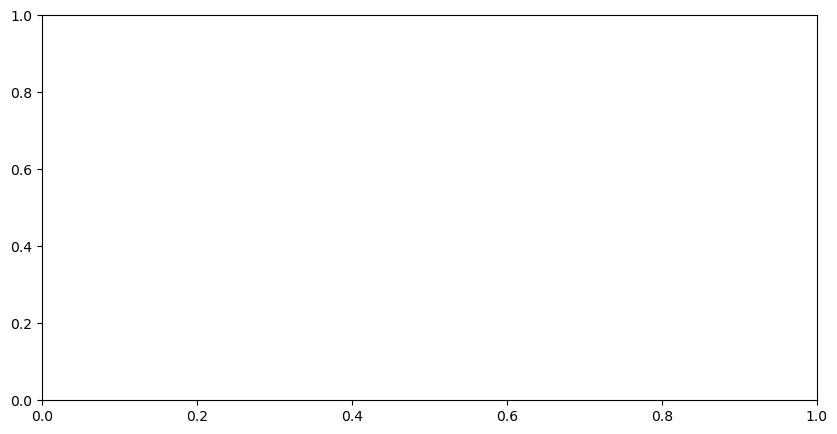

In [381]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Best Random Forest Regressor Feature Importances')
plt.show()

Encouragingly, the dominant top four features are in common with your linear model:
* fastQuads
* Runs
* Snow Making_ac
* vertical_drop

## 4.11 Final Model Selection<a id='4.11_Final_Model_Selection'></a>

Time to select your final model to use for further business modeling! It would be good to revisit the above model selection; there is undoubtedly more that could be done to explore possible hyperparameters.
It would also be worthwhile to investigate removing the least useful features. Gathering or calculating, and storing, features adds business cost and dependencies, so if features genuinely are not needed they should be removed.
Building a simpler model with fewer features can also have the advantage of being easier to sell (and/or explain) to stakeholders.
Certainly there seem to be four strong features here and so a model using only those would probably work well.
However, you want to explore some different scenarios where other features vary so keep the fuller 
model for now. 
The business is waiting for this model and you have something that you have confidence in to be much better than guessing with the average price.

Or, rather, you have two "somethings". You built a best linear model and a best random forest model. You need to finally choose between them. You can calculate the mean absolute error using cross-validation. Although `cross-validate` defaults to the $R^2$ [metric for scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring) regression, you can specify the mean absolute error as an alternative via
the `scoring` parameter.

### 4.11.1 Linear regression model performance<a id='4.11.1_Linear_regression_model_performance'></a>

In [382]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [383]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

NameError: name 'lr_neg_mae' is not defined

In [294]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### 4.11.2 Random forest regression model performance<a id='4.11.2_Random_forest_regression_model_performance'></a>

In [384]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [101]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(9.644639167595688, 1.3528565172191818)

In [296]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### 4.11.3 Conclusion<a id='4.11.3_Conclusion'></a>

The random forest model has a lower cross-validation mean absolute error by almost \\$1. It also exhibits less variability. Verifying performance on the test set produces performance consistent with the cross-validation results.

## 4.12 Data quantity assessment<a id='4.12_Data_quantity_assessment'></a>

Finally, you need to advise the business whether it needs to undertake further data collection. Would more data be useful? We're often led to believe more data is always good, but gathering data invariably has a cost associated with it. Assess this trade off by seeing how performance varies with differing data set sizes. The `learning_curve` function does this conveniently.

In [103]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

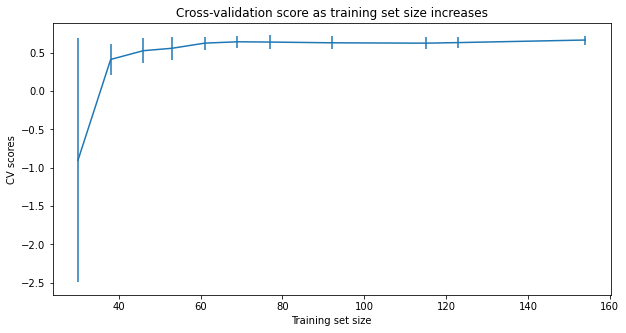

In [104]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

This shows that you seem to have plenty of data. There's an initial rapid improvement in model scores as one would expect, but it's essentially levelled off by around a sample size of 40-50.

## 4.13 Save best model object from pipeline<a id='4.13_Save_best_model_object_from_pipeline'></a>

In [ ]:
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_
best_model.version = ___
best_model.pandas_version = ___
best_model.numpy_version = ___
best_model.sklearn_version = ___
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = ___

In [245]:

# Get the current datetime
current_datetime = datetime.datetime.now()

# Set attributes for the best model
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn.__version__
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = current_datetime

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [246]:
# save the model

modelpath = '../models'
save_file(best_model, 'ski_resort_pricing_model.pkl', modelpath)

NameError: name 'best_model' is not defined

## 4.14 Summary<a id='4.14_Summary'></a>

**Q: 1** Write a summary of the work in this notebook. Capture the fact that you gained a baseline idea of performance by simply taking the average price and how well that did. Then highlight that you built a linear model and the features that found. Comment on the estimate of its performance from cross-validation and whether its performance on the test split was consistent with this estimate. Also highlight that a random forest regressor was tried, what preprocessing steps were found to be best, and again what its estimated performance via cross-validation was and whether its performance on the test set was consistent with that. State which model you have decided to use going forwards and why. This summary should provide a quick overview for someone wanting to know quickly why the given model was chosen for the next part of the business problem to help guide important business decisions.

**A: 1** Your answer here